# Notebook for GEX data quality check

- Last updated: 11/1/2023
- Author: Yang-Joon Kim
- Goal: We want to assess the data quality of GEX compared to Zebrahub (which we think our sequencing depth was really good).






In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

In [2]:
# import GEX datasets from sc-multiome datasets 
GEX1 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/filtered_feature_bc_matrix.h5") # 15somites_rep1
GEX2 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119/outs/filtered_feature_bc_matrix.h5") # 15somites_rep2
GEX3 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR124/outs/filtered_feature_bc_matrix.h5") # 30somites
GEX4 = sc.read_10x_h5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR125/outs/filtered_feature_bc_matrix.h5") # 20somites

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
RNA1 = sc.read_10x_h5("/hpc/projects/zebrahub/count_matrices/TDR46/filtered_feature_bc_matrix.h5") # 30 somites
RNA2 = sc.read_10x_h5("/hpc/projects/zebrahub/count_matrices/TDR43/filtered_feature_bc_matrix.h5") # 30 somites
RNA3 = sc.read_10x_h5("/hpc/projects/zebrahub/count_matrices/TDR40/filtered_feature_bc_matrix.h5") # 15 somites     

/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/user_apps/data.science/conda_envs/single-cell-basics/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
sc.pp.calculate_qc_metrics(GEX1, inplace=True)
sc.pp.calculate_qc_metrics(GEX2, inplace=True)
sc.pp.calculate_qc_metrics(GEX3, inplace=True)
sc.pp.calculate_qc_metrics(GEX4, inplace=True)
sc.pp.calculate_qc_metrics(RNA1, inplace=True)
sc.pp.calculate_qc_metrics(RNA2, inplace=True)
sc.pp.calculate_qc_metrics(RNA3, inplace=True)

Text(0, 0.5, 'number of genes/cell')

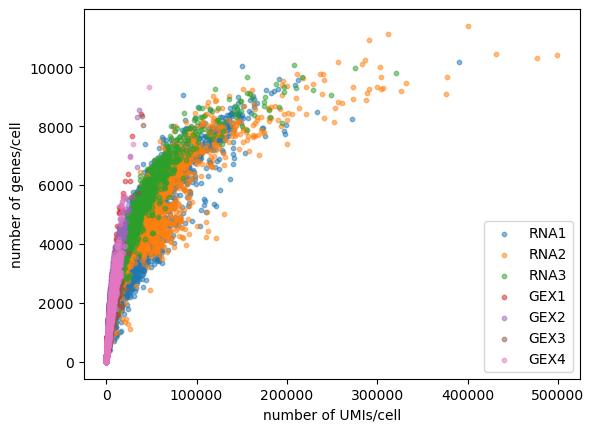

In [54]:
# scatter plot of number of UMIs/cell vs genes/cell at single-cell level (N datasets)

alpha_val = 0.5
size_spot = 10

plt.scatter(RNA1.obs.total_counts, RNA1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA2.obs.total_counts, RNA2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA3.obs.total_counts, RNA3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)

plt.scatter(GEX1.obs.total_counts, GEX1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX2.obs.total_counts, GEX2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX3.obs.total_counts, GEX3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX4.obs.total_counts, GEX4.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)



plt.legend(["RNA1","RNA2","RNA3","GEX1","GEX2","GEX3","GEX4"])

plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

Text(0, 0.5, 'number of genes/cell')

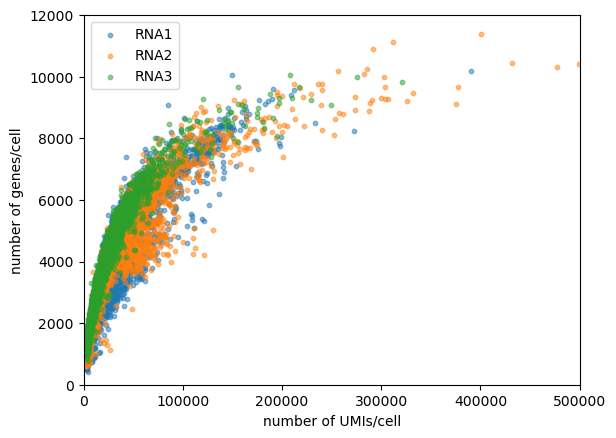

In [55]:
alpha_val = 0.5
size_spot = 10

plt.scatter(RNA1.obs.total_counts, RNA1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA2.obs.total_counts, RNA2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(RNA3.obs.total_counts, RNA3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.xlim([0, 500000])
plt.ylim([0,12000])
plt.legend(["RNA1","RNA2","RNA3"])
plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

Text(0, 0.5, 'number of genes/cell')

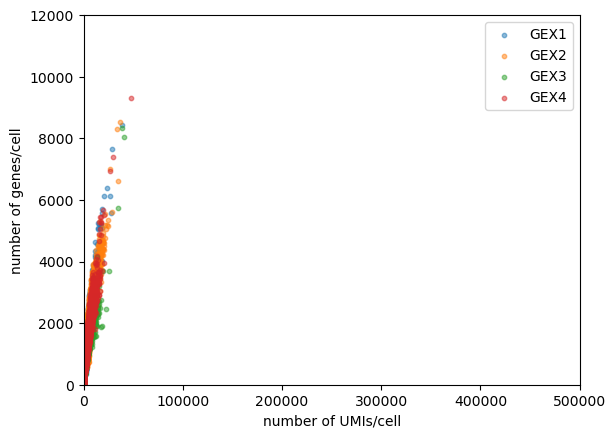

In [56]:
alpha_val = 0.5
size_spot = 10

plt.scatter(GEX1.obs.total_counts, GEX1.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX2.obs.total_counts, GEX2.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX3.obs.total_counts, GEX3.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)
plt.scatter(GEX4.obs.total_counts, GEX4.obs.n_genes_by_counts, alpha=alpha_val, s=size_spot)

plt.xlim([0, 500000])
plt.ylim([0,12000])
plt.legend(["GEX1","GEX2","GEX3","GEX4"])
plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

In [ ]:
plt.scatter(GEX1.obs.total_counts, GEX1.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(GEX2.obs.total_counts, GEX2.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(GEX3.obs.total_counts, GEX3.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(GEX4.obs.total_counts, GEX4.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(RNA1.obs.total_counts, RNA1.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(RNA2.obs.total_counts, RNA2.obs.n_genes_by_counts, alpha=0.5)
plt.scatter(RNA3.obs.total_counts, RNA3.obs.n_genes_by_counts, alpha=0.5)

plt.legend(["GEX1","GEX2","GEX3","GEX4",
            "RNA1","RNA2","RNA3"])

plt.xlabel("number of UMIs/cell")
plt.ylabel("number of genes/cell")

In [12]:
np.median(GEX1.obs.total_counts)
np.median(GEX1.obs.n_genes_by_counts)

959.0

In [24]:
median_UMIs_cell

[2024.0, 3966.0, 2255.5, 2867.0, 8184.0, 3590.0, 5358.0]

In [25]:
median_genes_cell

[959.0, 1644.0, 849.0, 1126.0, 2053.0, 1161.0, 1718.0]

In [27]:
median_UMIs_cell

[2483.8826, 4672.005, 2873.3274, 3265.9392, 13005.609, 13928.306, 9464.16]

In [28]:
median_genes_cell

[1062.0500346500346,
 1738.152437679241,
 944.3947070798462,
 1206.540252827678,
 2344.7421612165253,
 2035.0845360824742,
 2138.9623098667385]

In [31]:
import scipy.stats

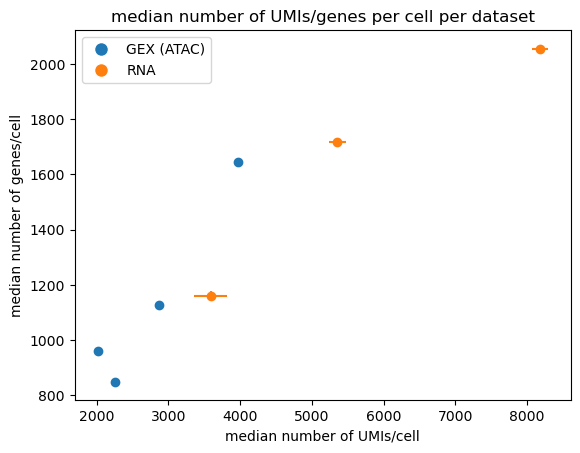

In [63]:
adata_list = [GEX1,GEX2,GEX3,GEX4,RNA1,RNA2,RNA3]
types = ['GEX', 'GEX', 'GEX', 'GEX', 'RNA', 'RNA', 'RNA']

# UMIs
median_UMIs_cell = []
std_UMIs_cell = []
sem_UMIs_cell = []

# genes
median_genes_cell = []
std_genes_cell = []
sem_genes_cell = []

for adata in adata_list:
    median_counts = np.median(adata.obs.total_counts)
    std_counts = np.std(adata.obs.total_counts)
    sem_counts = scipy.stats.sem(adata.obs.total_counts)
    
    median_genes = np.median(adata.obs.n_genes_by_counts)
    std_genes = np.std(adata.obs.n_genes_by_counts)
    sem_genes = scipy.stats.sem(adata.obs.n_genes_by_counts)
    
    median_UMIs_cell.append(median_counts)
    std_UMIs_cell.append(std_counts)
    sem_UMIs_cell.append(sem_counts)
    
    median_genes_cell.append(median_genes)
    std_genes_cell.append(std_genes)
    sem_genes_cell.append(sem_genes)
    
# Assign colors based on type
colors = ['C0' if typ == 'GEX' else 'C1' for typ in types]

for x, y, xerr, yerr, color in zip(median_UMIs_cell, median_genes_cell, sem_UMIs_cell, sem_genes_cell, colors):
    plt.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle='none', marker='o', color=color)
    
# plt.errorbar(x=median_UMIs_cell, y=median_genes_cell, 
#              xerr=sem_UMIs_cell, yerr=sem_genes_cell,
#              linestyle='none')

plt.title("median number of UMIs/genes per cell per dataset")
plt.xlabel("median number of UMIs/cell")
plt.ylabel("median number of genes/cell")

# Create custom legend
gex_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C0', markersize=10)
rna_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='C1', markersize=10)
plt.legend([gex_legend, rna_legend], ['GEX (ATAC)', 'RNA'], loc='upper left')


In [58]:
median_UMIs_cell

[2024.0, 3966.0, 2255.5, 2867.0, 8184.0, 3590.0, 5358.0]

# Assessment of sequencing depth (at sequencer)

- comparison of number of "duplicated" reads vs. number of UMIs (per cell, or per sample)


- per cell metric might need access and some coding to extract the information from the BAM files. So, we'll just use the web_summary files from 10xGenomics, which gives some ball park numbers.



In [79]:
import os
# directory where all aligned datasets are saved
path_aligned_data = "/hpc/projects/zebrahub/count_matrices/"
# list all subdiretories (each 10x sample from Zebrahub)
entries = os.listdir(path_aligned_data)
entries

['TDR47',
 'TDR66',
 'TDR55',
 'TDR18',
 'TDR56',
 'TDR79',
 'TDR109',
 'TDR89',
 'TDR23',
 'TDR90',
 'TDR57control',
 'TDR86',
 'TDR36',
 'TDR71',
 'TDR27',
 'TDR50',
 'TDR28',
 'TDR70',
 'TDR33',
 'TDR34',
 'TDR82',
 'TDR38',
 'TDR85',
 'TDR93',
 'TDR43',
 'TDR102',
 'TDR32',
 'TDR39',
 'TDR57',
 'TDR81',
 'TDR67',
 'TDR25',
 'TDR54',
 'TDR31',
 'TDR103',
 'TDR62',
 'TDR59',
 'TDR55NovaSeq',
 'TDR29',
 'TDR57Novaseq',
 'TDR94',
 'TDR63',
 'TDR73',
 'TDR42',
 'TDR55control',
 'TDR106',
 'TDR58',
 'TDR53',
 'TDR30',
 'TDR91',
 'TDR101',
 'TDR84',
 'TDR108',
 'TDR52',
 'TDR100',
 'TDR65',
 'TDR49',
 'TDR45',
 'TDR92',
 'TDR40',
 'TDR61',
 'TDR51',
 'TDR22',
 'TDR37',
 'TDR35',
 'TDR21',
 'TDR44',
 'TDR60',
 'TDR26',
 'TDR56Novaseq',
 'TDR64',
 'TDR83',
 'TDR24',
 'TDR80',
 'TDR48',
 'TDR68',
 'TDR72',
 'TDR19',
 'TDR46',
 'TDR69',
 'TDR41',
 'Pilot1',
 'TDR74',
 'TDR88',
 'TDR107']

In [84]:
metrics_summary = pd.read_csv('/hpc/projects/zebrahub/count_matrices/TDR46/metrics_summary.csv')
metrics_summary


,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Sequencing Saturation,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in UMI,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Exonic Regions,Reads Mapped Confidently to Transcriptome,Reads Mapped Antisense to Gene,Fraction Reads in Cells,Total Genes Detected,Median UMI Counts per Cell
0,"22,293","36,905","2,053","822,745,339",96.5%,33.1%,96.7%,95.4%,96.5%,95.9%,90.4%,5.6%,8.1%,76.6%,71.9%,2.0%,75.2%,"26,764","8,184"


In [132]:
import os
# directory where all aligned datasets are saved
path_aligned_data = "/hpc/projects/zebrahub/count_matrices/"
# list all subdiretories (each 10x sample from Zebrahub)
entries = os.listdir(path_aligned_data)
entries

# Initialize an empty DataFrame for the master data
master_df = pd.DataFrame()
    
# Loop through each subdirectory
for entry in entries:
    # Construct the path to metrics_summary.csv in the current subdirectory
    csv_path = os.path.join(path_aligned_data, entry, 'metrics_summary.csv')
    
    # Check if metrics_summary.csv exists
    if os.path.exists(csv_path):
        print(f'Reading metrics from {csv_path}')
        
        # Read the CSV file
        df = pd.read_csv(csv_path)
        
        # Set the index of the DataFrame to the name of the subdirectory
        df.index = [entry] * len(df)
        
        # Concatenate the DataFrame to the master data
        master_df = pd.concat([master_df, df])
        
    else:
        print(f'metrics_summary.csv does not exist in {entry}')
        
# Print the master DataFrame
print(master_df)

Reading metrics from /hpc/projects/zebrahub/count_matrices/TDR47/metrics_summary.csv
metrics_summary.csv does not exist in TDR66
metrics_summary.csv does not exist in TDR55
metrics_summary.csv does not exist in TDR18
metrics_summary.csv does not exist in TDR56
metrics_summary.csv does not exist in TDR79
metrics_summary.csv does not exist in TDR109
metrics_summary.csv does not exist in TDR89
metrics_summary.csv does not exist in TDR23
metrics_summary.csv does not exist in TDR90
metrics_summary.csv does not exist in TDR57control
metrics_summary.csv does not exist in TDR86
Reading metrics from /hpc/projects/zebrahub/count_matrices/TDR36/metrics_summary.csv
metrics_summary.csv does not exist in TDR71
Reading metrics from /hpc/projects/zebrahub/count_matrices/TDR27/metrics_summary.csv
Reading metrics from /hpc/projects/zebrahub/count_matrices/TDR50/metrics_summary.csv
Reading metrics from /hpc/projects/zebrahub/count_matrices/TDR28/metrics_summary.csv
metrics_summary.csv does not exist in T

In [133]:
master_df

,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Sequencing Saturation,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in UMI,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Exonic Regions,Reads Mapped Confidently to Transcriptome,Reads Mapped Antisense to Gene,Fraction Reads in Cells,Total Genes Detected,Median UMI Counts per Cell
TDR47,"12,389","76,898",953,"952,696,760",95.4%,50.3%,96.7%,94.7%,96.2%,94.6%,66.7%,7.4%,12.3%,47.0%,44.5%,1.2%,34.6%,"26,104","2,861"
TDR36,"10,092","97,022","1,439","979,154,564",96.9%,57.0%,96.5%,95.1%,96.3%,95.7%,88.6%,6.1%,7.3%,75.2%,71.3%,1.5%,56.7%,"25,935","4,005"
TDR27,"12,786","134,728",823,"1,722,632,982",90.1%,76.8%,96.8%,95.0%,96.7%,94.0%,78.4%,8.0%,5.7%,64.7%,59.5%,2.8%,52.0%,"26,198","2,203"
TDR50,"9,917","80,432",639,"797,650,025",95.4%,53.3%,96.6%,94.8%,96.1%,94.4%,61.3%,7.5%,10.1%,43.7%,41.4%,1.0%,31.5%,"25,410","1,702"
TDR28,"13,792","101,467","1,102","1,399,439,746",95.9%,66.6%,96.9%,94.5%,96.7%,93.3%,79.4%,7.3%,6.2%,65.9%,61.3%,2.0%,53.5%,"26,399","3,147"
TDR33,"10,122","165,246",813,"1,672,628,051",96.7%,81.3%,96.9%,94.7%,96.7%,94.4%,76.5%,6.7%,5.5%,64.3%,59.7%,2.3%,31.9%,"25,364","2,228"
TDR34,"4,713","175,821",400,"828,645,028",96.3%,86.1%,97.0%,94.6%,96.8%,91.3%,69.9%,7.2%,5.4%,57.3%,53.4%,2.0%,24.4%,"22,314",816
TDR38,"9,883","80,040","1,342","791,040,308",97.5%,57.0%,96.5%,95.2%,96.4%,95.6%,88.1%,5.4%,7.4%,75.2%,71.8%,1.4%,40.1%,"24,868","3,477"
TDR43,"13,095","82,666","1,161","1,082,515,598",97.1%,55.3%,96.7%,94.6%,96.5%,95.7%,86.5%,5.1%,6.9%,74.5%,70.0%,1.8%,54.3%,"26,349","3,590"
TDR32,"11,027","172,046",652,"1,897,155,476",96.8%,89.0%,96.8%,94.4%,96.6%,93.2%,77.5%,6.1%,5.2%,66.2%,61.7%,2.3%,33.2%,"24,901","1,654"


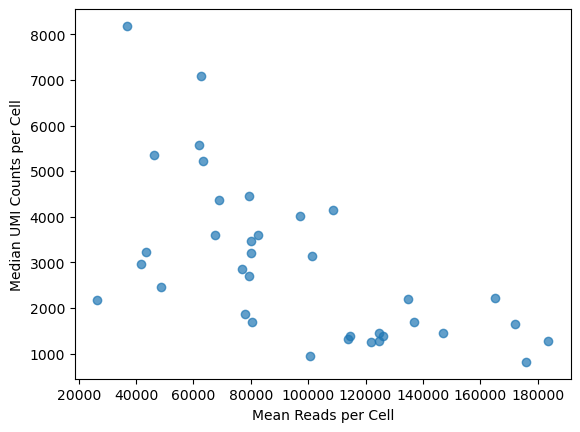

In [148]:
# replace the strings to "integers" for plotting
master_df['mean_reads_per_cell'] = [int(value.replace(",", "")) if isinstance(value, str) else value for value in master_df['Mean Reads per Cell']]
master_df['median_umi_counts_per_cell'] = [int(value.replace(",", "")) if isinstance(value, str) else value for value in master_df['Median UMI Counts per Cell']]

plt.scatter(master_df['mean_reads_per_cell'], master_df['median_umi_counts_per_cell'], alpha=0.7)
plt.xlabel('Mean Reads per Cell')
plt.ylabel('Median UMI Counts per Cell')
plt.show()


## Repeat the same procedure for the single-cell multiome (GEX)



In [142]:
csv_path = os.path.join(path_aligned_data, entry,"outs", 'metrics_summary.csv')
csv_path

'/hpc/projects/zebrahub/count_matrices/TDR107/outs/metrics_summary.csv'

In [144]:
import os
# directory where all aligned datasets are saved
path_aligned_data = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/"
# list all subdiretories (each 10x sample from Zebrahub)
# entries = os.listdir(path_aligned_data)
entries = ["TDR118","TDR119","TDR124","TDR125"]

# Initialize an empty DataFrame for the master data
master_df_multiome = pd.DataFrame()
    
# Loop through each subdirectory
for entry in entries:
    # Construct the path to metrics_summary.csv in the current subdirectory
    csv_path = os.path.join(path_aligned_data, entry,"outs", 'summary.csv')
    
    # Check if metrics_summary.csv exists
    if os.path.exists(csv_path):
        print(f'Reading metrics from {csv_path}')
        
        # Read the CSV file
        df = pd.read_csv(csv_path)
        
        # Set the index of the DataFrame to the name of the subdirectory
        df.index = [entry] * len(df)
        
        # Concatenate the DataFrame to the master data
        master_df_multiome = pd.concat([master_df_multiome, df])
        
    else:
        print(f'metrics_summary.csv does not exist in {entry}')
        
# Print the master DataFrame
print(master_df_multiome)

Reading metrics from /hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/summary.csv
Reading metrics from /hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119/outs/summary.csv
Reading metrics from /hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR124/outs/summary.csv
Reading metrics from /hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR125/outs/summary.csv
       Sample ID                   Genome      Pipeline version  \
TDR118    TDR118  zebrafish_genome_GRCz11  cellranger-arc-2.0.2   
TDR119    TDR119  zebrafish_genome_GRCz11  cellranger-arc-2.0.2   
TDR124    TDR124  zebrafish_genome_GRCz11  cellranger-arc-2.0.2   
TDR125    TDR125  zebrafish_genome_GRCz11  cellranger-arc-2.0.2   

        Estimated number of cells  Feature linkages detected  Linked genes  \
TDR118                      14430                     986771         11180   
TDR119          

In [145]:
master_df_multiome

,Sample ID,Genome,Pipeline version,Estimated number of cells,Feature linkages detected,Linked genes,Linked peaks,ATAC Confidently mapped read pairs,ATAC Fraction of genome in peaks,ATAC Fraction of high-quality fragments in cells,...,GEX Reads mapped confidently to genome,GEX Reads mapped confidently to intergenic regions,GEX Reads mapped confidently to intronic regions,GEX Reads mapped confidently to transcriptome,GEX Reads mapped to genome,GEX Reads with TSO,GEX Sequenced read pairs,GEX Total genes detected,GEX Valid UMIs,GEX Valid barcodes
TDR118,TDR118,zebrafish_genome_GRCz11,cellranger-arc-2.0.2,14430,986771,11180,134514,0.7512,0.1536,0.6953,...,0.8755,0.0558,0.0953,0.7639,0.9607,0.0753,315507090,26410,0.9994,0.9518
TDR119,TDR119,zebrafish_genome_GRCz11,cellranger-arc-2.0.2,13599,336981,12896,116933,0.7322,0.1465,0.6639,...,0.7462,0.0674,0.1050,0.6107,0.9192,0.1568,997181598,27829,0.9995,0.9200
TDR124,TDR124,zebrafish_genome_GRCz11,cellranger-arc-2.0.2,8842,102705,8224,48243,0.6977,0.1332,0.2898,...,0.9206,0.0344,0.0433,0.8402,0.9732,0.0366,622464082,24595,0.9990,0.9644
TDR125,TDR125,zebrafish_genome_GRCz11,cellranger-arc-2.0.2,19539,1136693,11929,134452,0.7780,0.1450,0.7380,...,0.9385,0.0401,0.0589,0.8554,0.9721,0.0401,628744706,26361,0.9990,0.9634


In [147]:
master_df_multiome.columns

Index(['Sample ID', 'Genome', 'Pipeline version', 'Estimated number of cells',
       'Feature linkages detected', 'Linked genes', 'Linked peaks',
       'ATAC Confidently mapped read pairs',
       'ATAC Fraction of genome in peaks',
       'ATAC Fraction of high-quality fragments in cells',
       'ATAC Fraction of high-quality fragments overlapping TSS',
       'ATAC Fraction of high-quality fragments overlapping peaks',
       'ATAC Fraction of transposition events in peaks in cells',
       'ATAC Mean raw read pairs per cell',
       'ATAC Median high-quality fragments per cell',
       'ATAC Non-nuclear read pairs', 'ATAC Number of peaks',
       'ATAC Percent duplicates', 'ATAC Q30 bases in barcode',
       'ATAC Q30 bases in read 1', 'ATAC Q30 bases in read 2',
       'ATAC Q30 bases in sample index i1', 'ATAC Sequenced read pairs',
       'ATAC TSS enrichment score', 'ATAC Unmapped read pairs',
       'ATAC Valid barcodes', 'GEX Fraction of transcriptomic reads in cells',
    

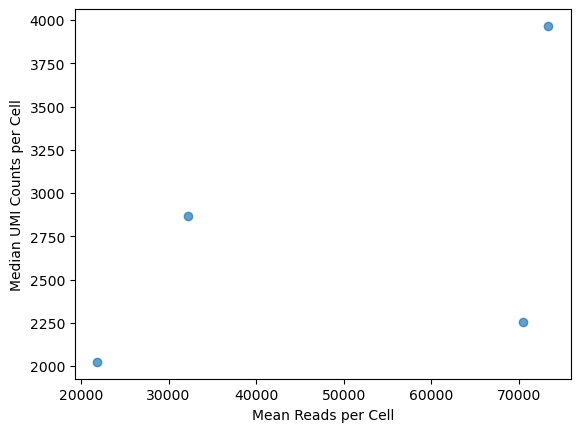

In [150]:
# replace the strings to "integers" for plotting
master_df_multiome['mean_reads_per_cell'] = [int(value.replace(",", "")) if isinstance(value, str) else value for value in master_df_multiome['GEX Mean raw reads per cell']]
master_df_multiome['median_umi_counts_per_cell'] = [int(value.replace(",", "")) if isinstance(value, str) else value for value in master_df_multiome['GEX Median UMI counts per cell']]

plt.scatter(master_df_multiome['mean_reads_per_cell'], master_df_multiome['median_umi_counts_per_cell'], alpha=0.7)
plt.xlabel('Mean Reads per Cell')
plt.ylabel('Median UMI Counts per Cell')
plt.show()

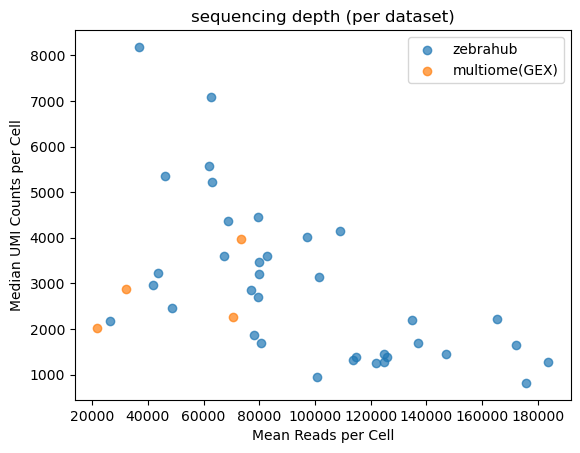

In [153]:
# Plot together RNA (Zebrahub) and GEX(sc-multiome)
plt.scatter(master_df['mean_reads_per_cell'], master_df['median_umi_counts_per_cell'], alpha=0.7)
plt.scatter(master_df_multiome['mean_reads_per_cell'], master_df_multiome['median_umi_counts_per_cell'], alpha=0.7)
plt.title("sequencing depth (per dataset)")
plt.xlabel('Mean Reads per Cell')
plt.ylabel('Median UMI Counts per Cell')
plt.legend(["zebrahub","multiome(GEX)"])

plt.show()

In [155]:
master_df_multiome['mean_reads_per_cell']

TDR118    21864.6632
TDR119    73327.5681
TDR124    70398.5616
TDR125    32178.9603
Name: mean_reads_per_cell, dtype: float64